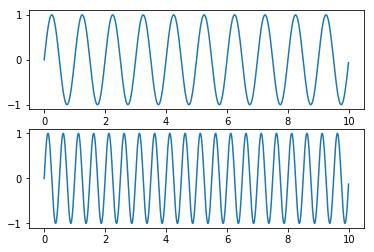

In [1]:
#Sharing axis limits and views

import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 10, 0.01)

ax1 = plt.subplot(211)

ax1.plot(t, np.sin(2*np.pi*t))

ax2 = plt.subplot(212, sharex=ax1)

ax2.plot(t, np.sin(4*np.pi*t))

plt.show()

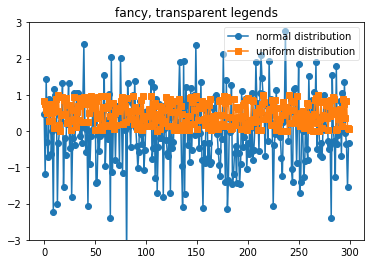

In [2]:
#Transparent, fancy legends

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)
fig, ax = plt.subplots(1)
ax.plot(np.random.randn(300), 'o-', label='normal distribution')
ax.plot(np.random.rand(300), 's-', label='uniform distribution')
ax.set_ylim(-3, 3)

ax.legend(loc='best', fancybox=True, framealpha=0.5)
ax.set_title('fancy, transparent legends')

plt.show()

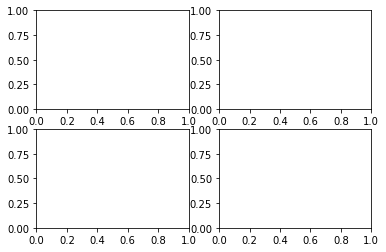

In [6]:
#Easily creating subplots

#In early versions of matplotlib, if you wanted to use the pythonic API 
#and create a figure instance and from that create a grid of subplots, 
#possibly with shared axes, it involved a fair amount of boilerplate code. e.g.

import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(50)

# old style
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(223, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(224, sharex=ax1, sharey=ax1)

'''
Fernando Perez has provided a nice top level method to create in subplots() (note the “s” at the end) 
everything at once, and turn on x and y sharing for the whole bunch. 
You can either unpack the axes individually:
'''

# new style method 1; unpack the axes fig, ((ax1, ax2), 
#(ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True) ax1.plot(x)

plt.show()

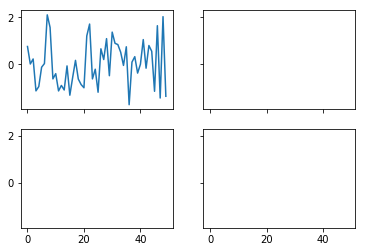

In [4]:
# new style method 2; use an axes array
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs[0, 0].plot(x)

plt.show()

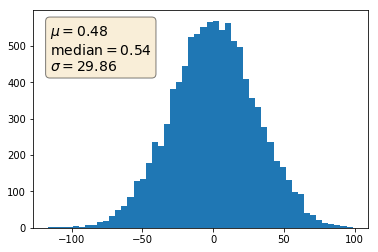

In [7]:
#Placing text boxes

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

fig, ax = plt.subplots()
x = 30*np.random.randn(10000)
mu = x.mean()
median = np.median(x)
sigma = x.std()
textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$' % (mu, median, sigma)

ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.show()

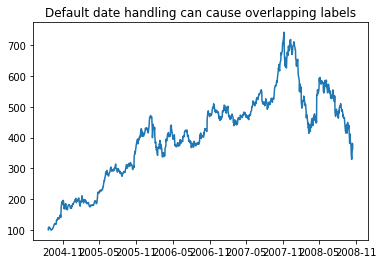

In [8]:
#Fixing common date annoyances

import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt

with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)

# Matplotlib prefers datetime instead of np.datetime64.
date = r.date.astype('O')
plt.figure()
plt.plot(date, r.close)
plt.title('Default date handling can cause overlapping labels')

plt.show()

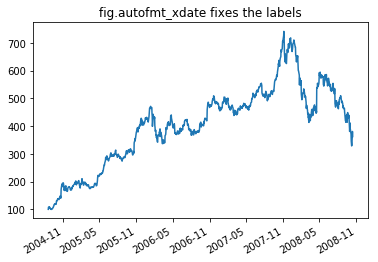

In [9]:
fig, ax = plt.subplots()
ax.plot(date, r.close)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# use a more precise date string for the x axis locations in the
# toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d') #日期格式
ax.set_title('fig.autofmt_xdate fixes the labels')

plt.show()

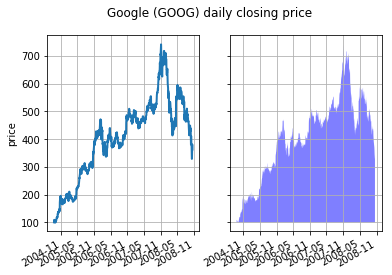

In [10]:
#Fill Between and Alpha

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook

# load up some sample financial data
with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)
# Matplotlib prefers datetime instead of np.datetime64.
date = r.date.astype('O')
# create two subplots with the shared x and y axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

pricemin = r.close.min()

ax1.plot(date, r.close, lw=2)
ax2.fill_between(date, pricemin, r.close, facecolor='blue', alpha=0.5)

for ax in ax1, ax2:
    ax.grid(True)

ax1.set_ylabel('price')
for label in ax2.get_yticklabels():
    label.set_visible(False)

fig.suptitle('Google (GOOG) daily closing price')
fig.autofmt_xdate()

plt.show()

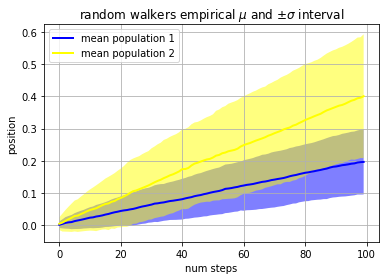

In [11]:
Nsteps, Nwalkers = 100, 250
t = np.arange(Nsteps)

# an (Nsteps x Nwalkers) array of random walk steps
S1 = 0.002 + 0.01*np.random.randn(Nsteps, Nwalkers)
S2 = 0.004 + 0.02*np.random.randn(Nsteps, Nwalkers)

# an (Nsteps x Nwalkers) array of random walker positions
X1 = S1.cumsum(axis=0)
X2 = S2.cumsum(axis=0)


# Nsteps length arrays empirical means and standard deviations of both
# populations over time
mu1 = X1.mean(axis=1)
sigma1 = X1.std(axis=1)
mu2 = X2.mean(axis=1)
sigma2 = X2.std(axis=1)

# plot it!
fig, ax = plt.subplots(1)
ax.plot(t, mu1, lw=2, label='mean population 1', color='blue')
ax.plot(t, mu2, lw=2, label='mean population 2', color='yellow')
ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='blue', alpha=0.5)
ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='yellow', alpha=0.5)
ax.set_title('random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()

plt.show()

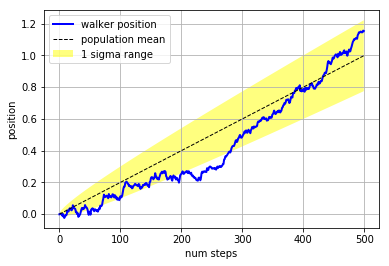

In [12]:
Nsteps = 500
t = np.arange(Nsteps)

mu = 0.002
sigma = 0.01

# the steps and position
S = mu + sigma*np.random.randn(Nsteps)
X = S.cumsum()

# the 1 sigma upper and lower analytic population bounds
lower_bound = mu*t - sigma*np.sqrt(t)
upper_bound = mu*t + sigma*np.sqrt(t)

fig, ax = plt.subplots(1)
ax.plot(t, X, lw=2, label='walker position', color='blue')
ax.plot(t, mu*t, lw=1, label='population mean', color='black', ls='--')
ax.fill_between(t, lower_bound, upper_bound, facecolor='yellow', alpha=0.5,
                label='1 sigma range')
ax.legend(loc='upper left')

# here we use the where argument to only fill the region where the
# walker is above the population 1 sigma boundary
ax.fill_between(t, upper_bound, X, where=X > upper_bound, facecolor='blue',
                alpha=0.5)
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()

plt.show()